In [22]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import re
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",100)

In [24]:
fiverr = pd.read_csv("./all_data.csv")

In [25]:
fiverr.shape

(16403, 12)

In [26]:
fiverr.head(2)

,category,rating,starting_price,subcategory,language,title,url,seller,pos_rating,num_reviews,location,ave_reponse_time
0,Business,rating-circles star-rating-s12 rate-9,$5,Branding Services,"English, French","I will create 10 POWERFUL slogans, headlines o...",https://www.fiverr.com/perfectionist0/create-1...,perfectionist0,98%,(20),United States,1 Hrs.
1,Business,rating-circles star-rating-s12 rate-9,$5,Branding Services,"English, Urdu",I will suggest 10 brand names for your business,https://www.fiverr.com/seotalent/suggest-10-br...,seotalent,96%,(646),Pakistan,1 Hrs.


In [27]:
# Getting the star-rating from the rating variable as a float

star_ratings = []

for i in range(len(fiverr.rating)):
    try:
        star_ratings.append(float(fiverr.rating[i][fiverr.rating[i].find("rate-") + 5:])/2.0)
    except:
        star_ratings.append(np.nan)

fiverr["star_rating"] = star_ratings

len(star_ratings)

16403

In [28]:
# Cleaning the num_reviews variable by removind "()" and "-" from the number of reviews and converting to a float

num_reviews_clean = []

for i in range(len(fiverr.num_reviews)):
    if type(fiverr.num_reviews[i]) == float:
        num_reviews_clean.append(fiverr.num_reviews[i])
    else:
        num_reviews_clean.append(float(re.sub("[^\.\w]", "", fiverr.num_reviews[i])))

fiverr["num_reviews_clean"] = num_reviews_clean    

len(num_reviews_clean)

16403

In [29]:
# Cleaning the ave_response_time variable by removing "Hrs" and converting the response time to a float 

ave_resptime_hrs = []

for i in range(len(fiverr.ave_reponse_time)):
    if type(fiverr.ave_reponse_time[i]) == float:
        ave_resptime_hrs.append(fiverr.ave_reponse_time[i])
    else:
        ave_resptime_hrs.append(float(re.sub("[^0-9]", "", fiverr.ave_reponse_time[i])))

fiverr["ave_response_time_hrs"] = ave_resptime_hrs    

len(ave_resptime_hrs)

16403

In [30]:
# Cleaning the pos_rating variable by removing "%" and converting to a float

pos_rating_percent = []

for i in range(len(fiverr.pos_rating)):
    if type(fiverr.pos_rating[i]) == float:
        pos_rating_percent.append(fiverr.pos_rating[i])
    else:
        pos_rating_percent.append(float(re.sub("[^0-9]", "", fiverr.pos_rating[i])))

fiverr["pos_rating_percent"] = pos_rating_percent    

len(pos_rating_percent)

16403

In [31]:
# Cleaning the pos_rating variable by removing "%" and converting to a float

starting_price_dollar = []

for i in range(len(fiverr.starting_price)):
    if type(fiverr.starting_price[i]) == float:
        starting_price_dollar.append(fiverr.starting_price[i])
    else:
        starting_price_dollar.append(float(re.sub("[^0-9]", "", fiverr.starting_price[i])))

fiverr["starting_price_dollar"] = starting_price_dollar    

len(starting_price_dollar)

16403

In [32]:
# Finding observation with missing location

for x in fiverr.loc[fiverr.location.isnull(), ].url:
    print x
    
fiverr.loc[fiverr.location.isnull(), ]

https://www.fiverr.com/thanh0606/give-you-tee-spring-domination-video-course?context=adv.cat_8.subcat_26&context_type=rating&source=gallery-listing&ref_ctx_id=576247fc-d2b3-430c-b262-d9371e3ed5dd&filtered_price=&pckg_id=1&pos=21&funnel=13a2b56d-48fe-4d07-8465-51e00a43e76f


,category,rating,starting_price,subcategory,language,title,url,seller,pos_rating,num_reviews,location,ave_reponse_time,star_rating,num_reviews_clean,ave_response_time_hrs,pos_rating_percent,starting_price_dollar
15460,Business,rating-circles star-rating-s12 rate-10,$15,Business Tips,English,I will give You Tee Spring Domination For Dummies,https://www.fiverr.com/thanh0606/give-you-tee-...,thanh0606,99%,-18.0,NaN,1 Hrs.,5.0,18.0,1.0,99.0,15.0


In [33]:
# Finding observation with "Unknown" location

fiverr.loc[fiverr.location == "Unknown", ]

,category,rating,starting_price,subcategory,language,title,url,seller,pos_rating,num_reviews,location,ave_reponse_time,star_rating,num_reviews_clean,ave_response_time_hrs,pos_rating_percent,starting_price_dollar
242,Digital Marketing,rating-circles star-rating-s12 rate-10,$10,SEO,English,"I will do 99 highpr BACKLINKS, to your website",https://www.fiverr.com/tecnic21/do-80-highpr-b...,tecnic21,95%,(78),Unknown,1 Hrs.,5.0,78.0,1.0,95.0,10.0
436,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$60,Spiritual & Healing,English,I will clear your karma with an Archangel,https://www.fiverr.com/shanu247/clear-your-kar...,shanu247,100%,(23),Unknown,6 Hrs.,5.0,23.0,6.0,100.0,60.0
437,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$5,Spiritual & Healing,English,I will do Reiki healing for your pet,https://www.fiverr.com/shanu247/do-reiki-heali...,shanu247,100%,(64),Unknown,6 Hrs.,5.0,64.0,6.0,100.0,5.0
454,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$5,"Health, Nutrition & Fitness",English,I will give 101 WHITEBOARD Animation Videos in...,https://www.fiverr.com/healthfitnessma/give-10...,healthfitnessma,96%,(56),Unknown,22 Hrs.,5.0,56.0,22.0,96.0,5.0
504,Digital Marketing,rating-circles star-rating-s12 rate-9,$5,SEO,"English, French, Spanish","I will do 65,000 GSA,ser bulk,links,blast for Seo",https://www.fiverr.com/seo_runner/do-65-000-gs...,seo_runner,95%,(28),Unknown,14 Hrs.,4.5,28.0,14.0,95.0,5.0
524,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$5,Spiritual & Healing,English,I will remove a spirit from your home,https://www.fiverr.com/shanu247/remove-a-spiri...,shanu247,100%,(90),Unknown,6 Hrs.,5.0,90.0,6.0,100.0,5.0
612,Programming & Tech,rating-circles star-rating-s12 rate-10,$15,Website Builders & CMS,English,"I will design a website on Squarespace, websit...",https://www.fiverr.com/everyouth/design-a-webs...,everyouth,91%,(1),Unknown,1 Hrs.,5.0,1.0,1.0,91.0,15.0
1331,Digital Marketing,rating-circles star-rating-s12 rate-10,$5,Influencer Marketing,"English, Ukrainian, Russian, Persian",I will guest post for YOU on my daily Beauty blog,https://www.fiverr.com/viikka/post-your-articl...,viikka,96%,(11),Unknown,1 Hrs.,5.0,11.0,1.0,96.0,5.0
1419,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$5,"Health, Nutrition & Fitness",English,I will give WEIGHTLOSS Whiteboard Videos,https://www.fiverr.com/healthfitnessma/give-we...,healthfitnessma,96%,(16),Unknown,22 Hrs.,5.0,16.0,22.0,96.0,5.0
1704,Fun & Lifestyle,rating-circles star-rating-s12 rate-10,$5,Astrology & Readings,English,I will answer ONE question from your Higher Self,https://www.fiverr.com/shanu247/answer-one-que...,shanu247,100%,(21),Unknown,6 Hrs.,5.0,21.0,6.0,100.0,5.0


In [34]:
# Converting "Unknown" location to NAN

fiverr.loc[fiverr.location == "Unknown", "location"] = np.nan

In [63]:
fiverr["norm_response_time"] = fiverr.groupby("category").ave_response_time_hrs.transform(lambda x: (x - x.mean()) / x.std())
fiverr["norm_star_rating"] = fiverr.groupby("location").star_rating.transform(lambda x: (x - x.mean()) / x.std())
fiverr.head(3)

,category,rating,starting_price,subcategory,language,title,url,seller,pos_rating,num_reviews,location,ave_reponse_time,star_rating,num_reviews_clean,ave_response_time_hrs,pos_rating_percent,starting_price_dollar,norm_response_time,norm_star_rating,isUS
0,Business,rating-circles star-rating-s12 rate-9,$5,Branding Services,"English, French","I will create 10 POWERFUL slogans, headlines o...",https://www.fiverr.com/perfectionist0/create-1...,perfectionist0,98%,(20),United States,1 Hrs.,4.5,20.0,1.0,98.0,5.0,-0.587312,-1.213088,US
1,Business,rating-circles star-rating-s12 rate-9,$5,Branding Services,"English, Urdu",I will suggest 10 brand names for your business,https://www.fiverr.com/seotalent/suggest-10-br...,seotalent,96%,(646),Pakistan,1 Hrs.,4.5,646.0,1.0,96.0,5.0,-0.587312,-1.732944,Not-US
2,Business,rating-circles star-rating-s12 rate-10,$5,Branding Services,"English, Spanish",I will give you the best slogan for your business,https://www.fiverr.com/startselect/give-you-th...,startselect,99%,(168),Nicaragua,6 Hrs.,5.0,168.0,6.0,99.0,5.0,0.655931,NaN,Not-US


In [39]:
fiverr.shape

(16332, 19)

In [40]:
fiverr = fiverr.drop_duplicates()
fiverr.shape

(16332, 19)

In [41]:
# Count of observations by country 

country_df = fiverr.groupby("location").agg("count")

country_df.rating.sort_values(ascending = False).head(25)

location
United States        3389
Pakistan             2322
India                1631
Bangladesh            971
Sri Lanka             688
United Kingdom        650
Indonesia             393
Canada                337
Nigeria               324
Venezuela             317
Romania               223
Philippines           190
Morocco               186
Serbia                157
Ukraine               156
Australia             150
Kenya                 136
Germany               130
Italy                 123
Vietnam               113
Israel                112
Macedonia [FYROM]     104
Bulgaria              103
Netherlands           100
Egypt                  98
Name: rating, dtype: int64

In [42]:
# Count of observations that are from the US and those that are not from the US

fiverr["isUS"] = ["US" if x == "United States" else "Not-US" for x in fiverr.location]

local_or_not = fiverr.groupby("isUS").agg("count")

local_or_not.location

isUS
Not-US    12611
US         3673
Name: location, dtype: int64

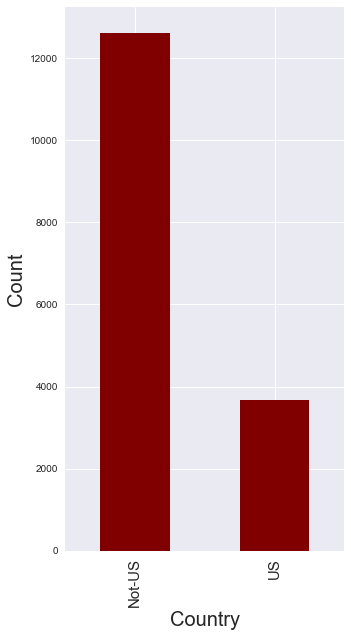

In [43]:
local_or_not.location.plot.bar(color = "maroon", figsize = (5,10))

plt.xlabel("Country", size = 20)
plt.ylabel("Count", size = 20)
plt.tick_params(axis='x', which='major', labelsize=15)

plt.show()

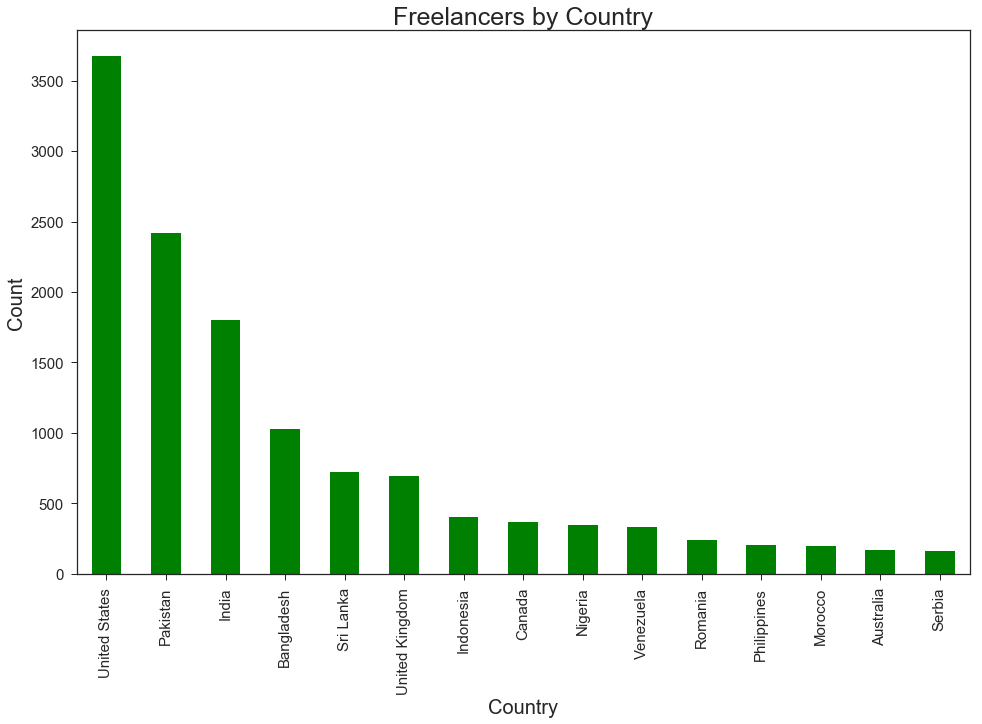

In [68]:
plt.figure(figsize=(16,10))
fiverr.groupby('location')['category'].agg("count").sort_values(ascending=False).head(15).plot.bar(color = "green")
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Freelancers by Country', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize = 15)
plt.show()

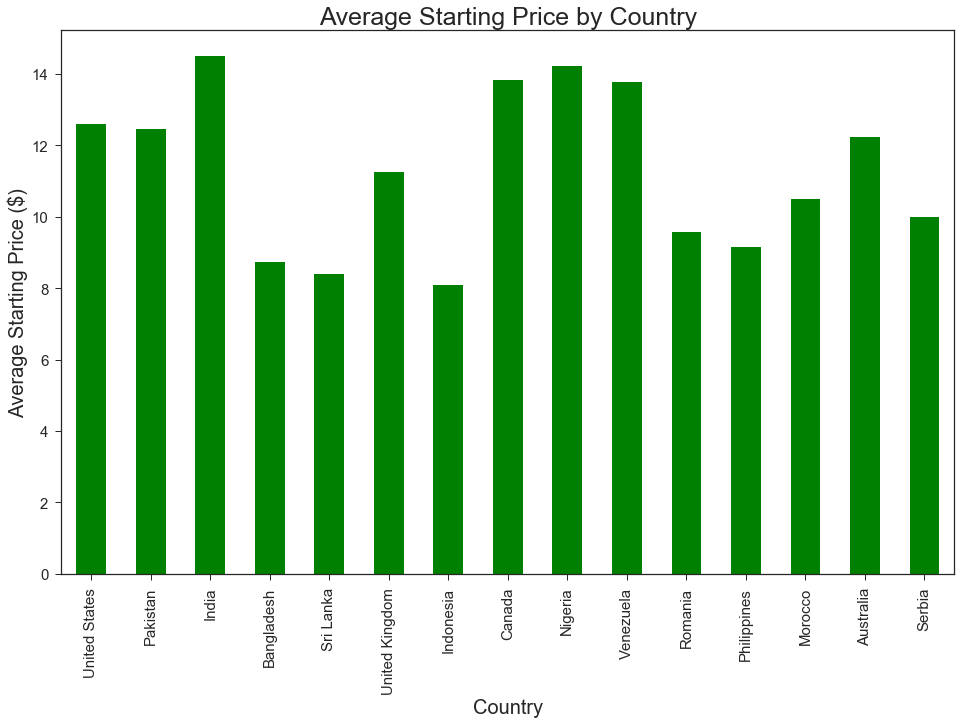

In [69]:
countries = fiverr.groupby('location')['category'].agg("count").sort_values(ascending=False).head(15).index
subset = fiverr[fiverr.location.isin(countries)]
plt.figure(figsize=(16,10))
subset2 = subset.groupby('location').starting_price_dollar.agg(["count", "mean"]).sort_values(by = "count", ascending = False)
subset2["mean"].plot.bar(color = "green")
plt.xlabel('Country', fontsize = 20)
plt.ylabel('Average Starting Price ($)', fontsize = 20)
plt.title('Average Starting Price by Country', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize = 15)
plt.show()

In [49]:
# Counts per category

category_df_noloc = fiverr.groupby(["category"]).location.agg("count")

for category in category_df_noloc.index:
    print category, "\n", category_df_noloc[category]

Advertising 
1
Business 
1903
Digital Marketing 
2650
Fun & Lifestyle 
2913
Graphics & Design 
3822
Music & Audio 
1654
Programming & Tech 
2150
Video & Animation 
1191


In [50]:
# Removing the Avertising category since it only has one single observation

fiverr = fiverr[fiverr.category != "Advertising"]

In [51]:
# Counts per category

category_df_noloc = fiverr.groupby(["category"]).location.agg("count")

for category in category_df_noloc.index:
    print category, "\n", category_df_noloc[category]

Business 
1903
Digital Marketing 
2650
Fun & Lifestyle 
2913
Graphics & Design 
3822
Music & Audio 
1654
Programming & Tech 
2150
Video & Animation 
1191


In [52]:
# Counts for each category by country

category_df = fiverr.groupby(["category", "location"]).location.agg("count")
to = 0

for category in category_df.index.levels[0]:
    print category, "\n", category_df[category].sort_values(ascending = False).head(5), "\n"

Business 
location
United States    580
Pakistan         342
India            155
Bangladesh       151
Nigeria          105
Name: location, dtype: int64 

Digital Marketing 
location
United States     700
India             414
Pakistan          331
Bangladesh        247
United Kingdom    140
Name: location, dtype: int64 

Fun & Lifestyle 
location
United States     947
India             217
Pakistan          171
Sri Lanka         132
United Kingdom    124
Name: location, dtype: int64 

Graphics & Design 
location
Pakistan         763
United States    384
India            379
Sri Lanka        334
Bangladesh       333
Name: location, dtype: int64 

Music & Audio 
location
United States     669
United Kingdom    182
Venezuela          81
Canada             67
Serbia             44
Name: location, dtype: int64 

Programming & Tech 
location
Pakistan         635
India            463
Bangladesh       222
United States    215
Sri Lanka         63
Name: location, dtype: int64 

Video & Animati

In [53]:
# Counts per each sub-category

subcategory_df_noloc = fiverr.groupby(["subcategory"]).location.agg("count")

for subcategory in subcategory_df_noloc.index:
    print subcategory, "\n", subcategory_df_noloc[subcategory]

3D & 2D Models 
240
Animated Characters & Modeling 
231
Arts & Crafts 
235
Astrology & Readings 
232
Banner Ads 
239
Book Covers & Packaging 
235
Branding Services 
239
Business Cards & Stationery 
238
Business Plans 
239
Business Tips 
235
Cartoons & Caricatures 
239
Celebrity Impersonators 
48
Content Marketing 
240
Data Analysis & Reports 
241
Databases 
239
Domain Research 
238
Ecommerce 
239
Editing & Post Production 
237
Family & Genealogy 
48
Financial Consulting 
239
Flyers & Posters 
242
Gaming 
234
Global Culture 
239
Greeting Cards & Videos 
237
Health, Nutrition & Fitness 
235
Illustration 
240
Influencer Marketing 
237
Infographics 
239
Intros & Animated Logos 
241
Invitations 
237
Jingles & Drops 
228
Legal Consulting 
236
Local Listings 
239
Logo Design 
238
Lyric & Music Videos 
237
Market Research 
237
Marketing Strategy 
233
Mixing & Mastering 
238
Mobile Advertising 
48
Mobile Apps & Web 
235
Online Lessons 
237
Other 
1
Photoshop Editing 
238
Pranks & Stunts 
229
Pr

In [54]:
# Counts for each sub-category by country

subcategory_df = fiverr.groupby(["subcategory", "location"]).location.agg("count")

for subcategory in subcategory_df.index.levels[0]:
    print subcategory, "\n", subcategory_df[subcategory].sort_values(ascending = False).head(5), "\n"

3D & 2D Models 
location
Vietnam       41
Pakistan      31
India         29
Bangladesh    19
Venezuela     17
Name: location, dtype: int64 

Animated Characters & Modeling 
location
India            53
United States    35
Pakistan         33
Sri Lanka        16
Bangladesh        9
Name: location, dtype: int64 

Arts & Crafts 
location
United States     80
Pakistan          22
Sri Lanka         18
India             17
United Kingdom     9
Name: location, dtype: int64 

Astrology & Readings 
location
United States     110
India              21
United Kingdom     20
Canada             13
Australia           8
Name: location, dtype: int64 

Banner Ads 
location
Pakistan         44
Sri Lanka        42
India            33
United States    21
Bangladesh       21
Name: location, dtype: int64 

Book Covers & Packaging 
location
United States    40
Pakistan         33
India            28
Sri Lanka        26
Nigeria          16
Name: location, dtype: int64 

Branding Services 
location
United Sta

In [103]:
# Chi Square Test of Independence to test if location and category/subcategory are independent

# Chi-Square Test of Independence: Category and Location
chi2, p, ddof, expected = chi2_contingency(pd.crosstab(fiverr.category, fiverr.location))
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print "Chi-Square Test of Independence: Category and Location"
print(msg.format(chi2, p, ddof))

# Chi-Square Test of Independence: Subcategory and Location
chi2, p, ddof, expected = chi2_contingency(pd.crosstab(fiverr.subcategory, fiverr.location))
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print "Chi-Square Test of Independence: Subcategory and Location"
print(msg.format(chi2, p, ddof))

Chi-Square Test of Independence: Category and Location
Test Statistic: 6458.27332173
p-value: 0.0
Degrees of Freedom: 852

Chi-Square Test of Independence: Subcategory and Location
Test Statistic: 27501.5005635
p-value: 0.0
Degrees of Freedom: 10224



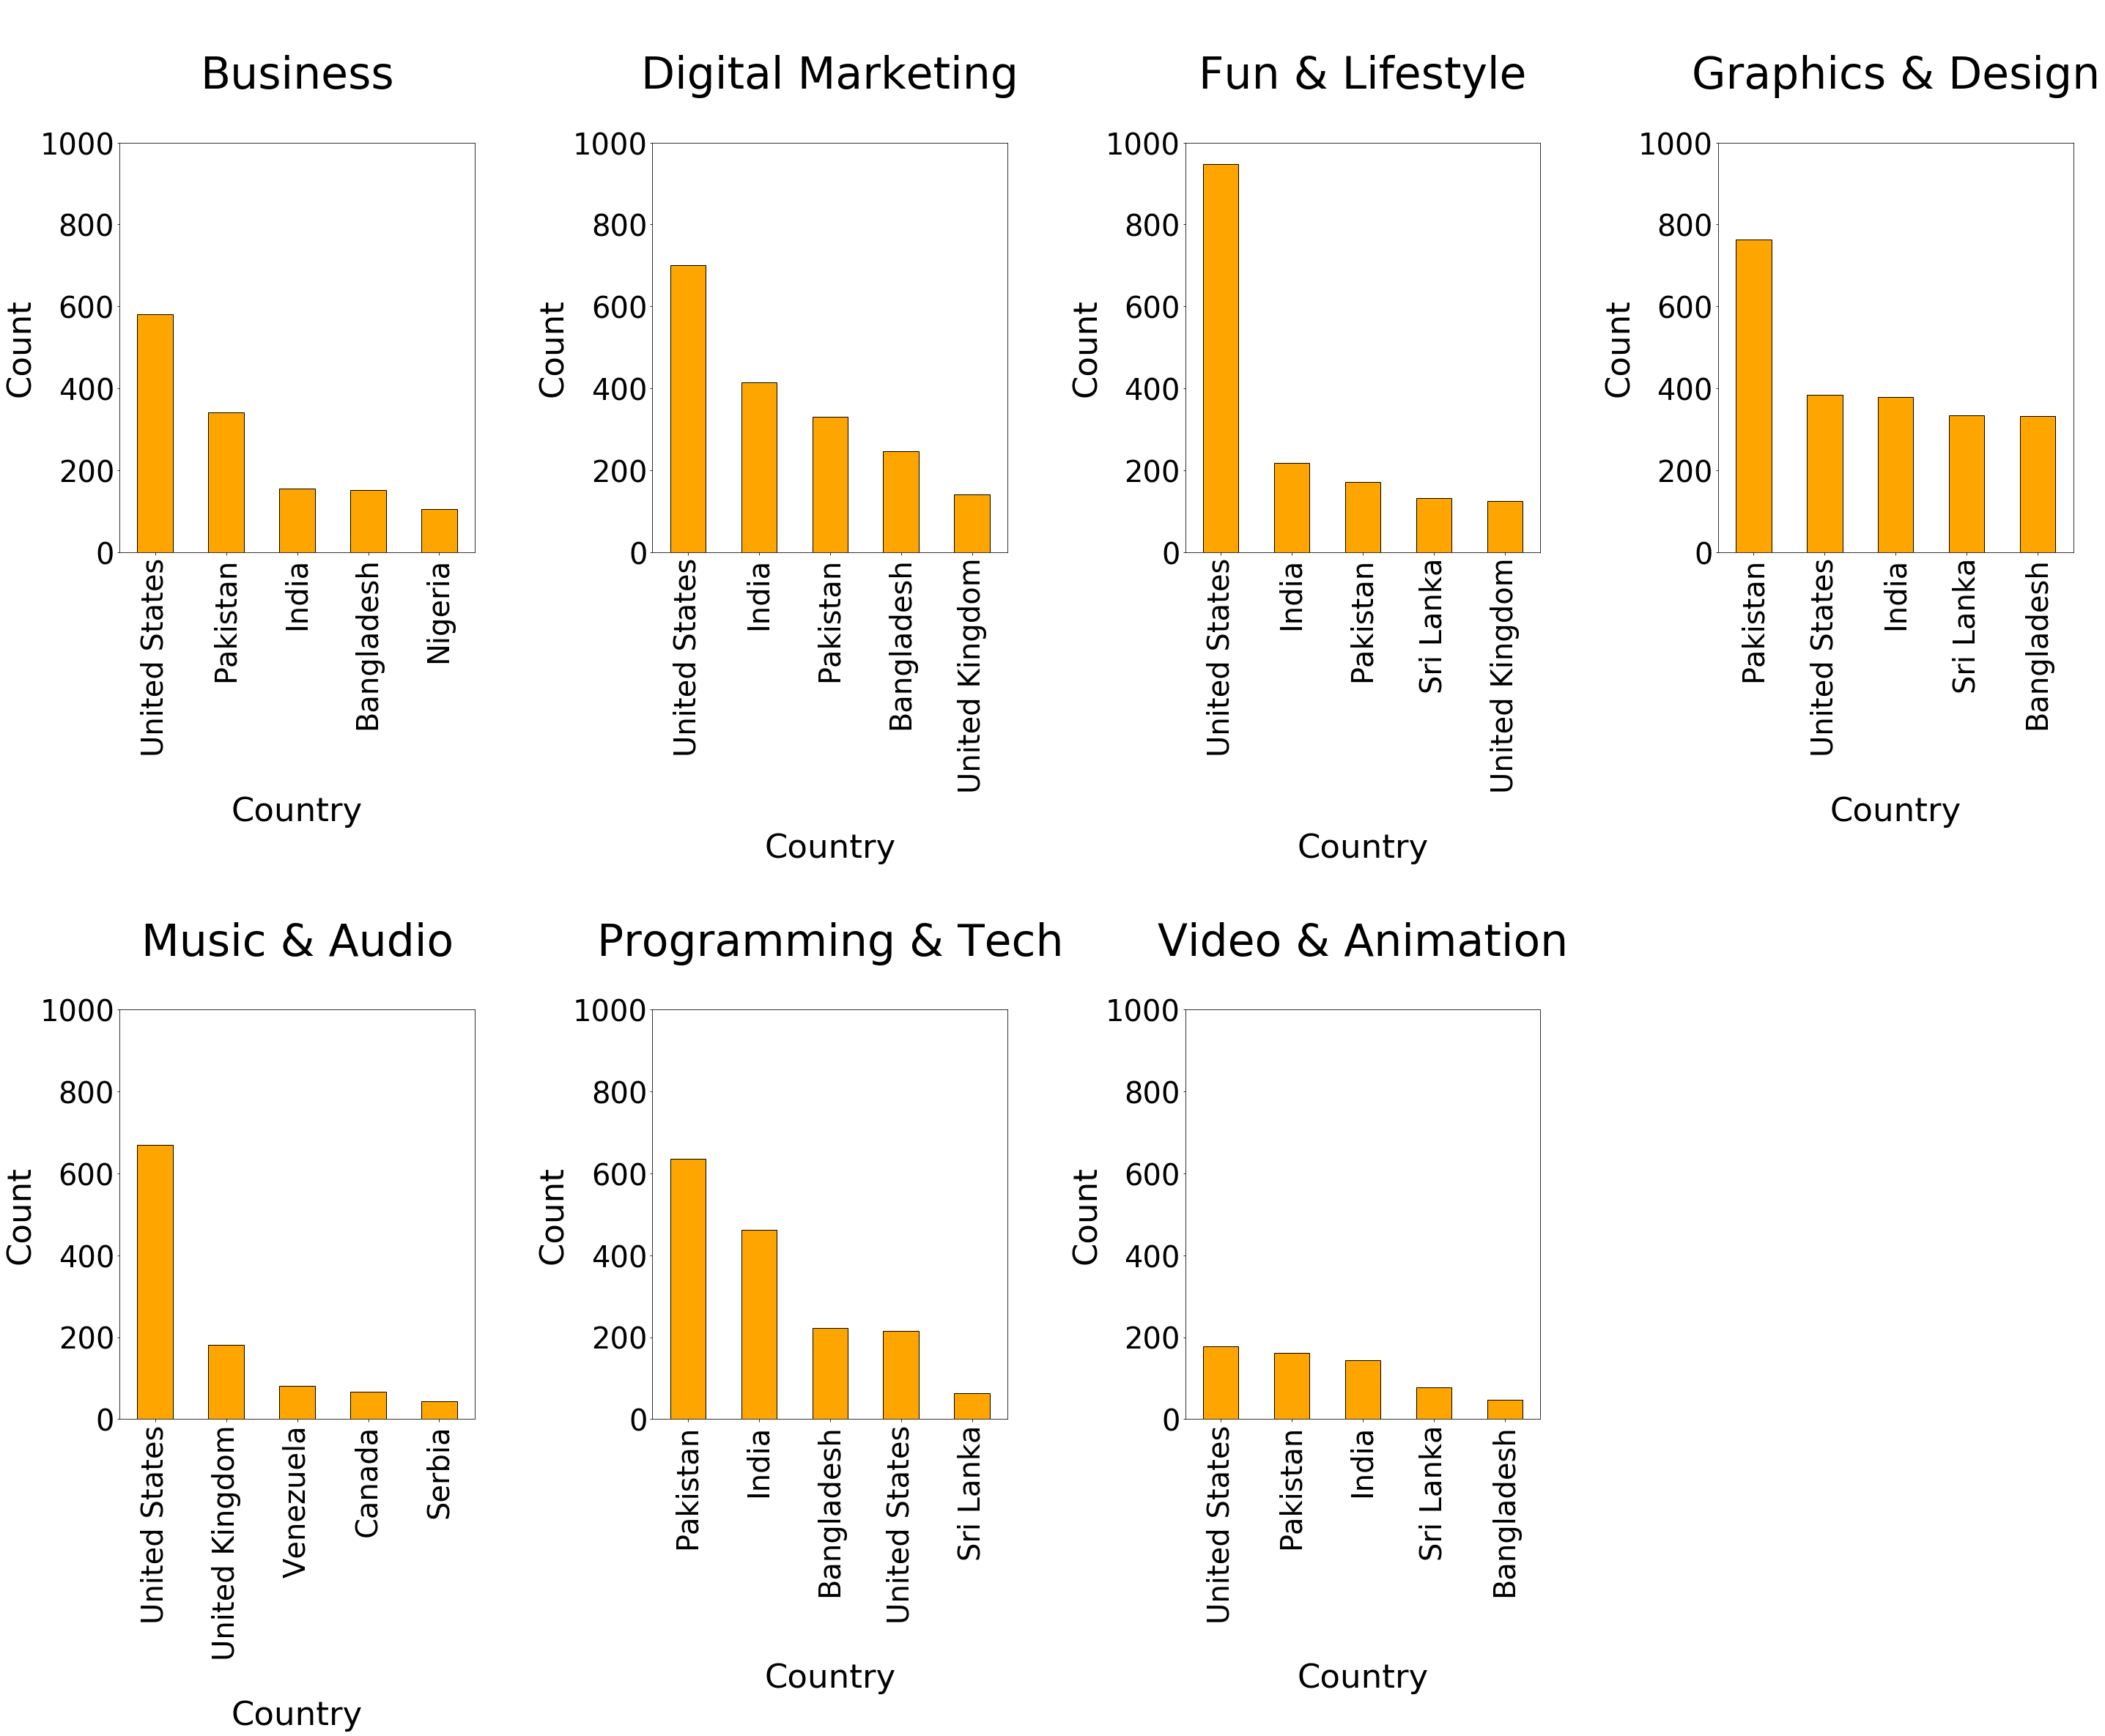

In [228]:
# Representation by Count of Top 5 Countries in each Category

Tot = len(set(fiverr.category))
Cols = 4

# Compute Rows required

Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

# # Create main figure

fig = plt.figure(figsize=(40, 60))

category_df = fiverr.groupby(["category", "location"]).location.agg("count")

for k in range(len(category_df.index.levels[0])):
    
    ax = fig.add_subplot(Rows, Cols, Position[k])
    category_df[category_df.index.levels[0][k]].sort_values(ascending = False).head(5).plot(kind = "bar", edgecolor ="black", color = "orange")
    plt.xlabel("\n" + 'Country', fontsize = 45)
    plt.ylabel('Count', fontsize = 45)
    plt.ylim((0,1000))
    plt.title("\n" + str(category_df.index.levels[0][k]) + "\n", fontsize = 60)
    ax.set_xticklabels([item.get_text() for item in ax.get_xticklabels()], size = 30)
    ax.tick_params(axis='y', which='major', labelsize=40)
    ax.tick_params(axis='x', which='major', labelsize=40)
    

plt.tight_layout()    
plt.show()

In [1417]:
# # Representation by Percentage of Top 5 Countries in each Category

# Tot = len(set(fiverr.category))
# Cols = 4

# # Compute Rows required

# Rows = Tot // Cols 
# Rows += Tot % Cols

# # Create a Position index

# Position = range(1,Tot + 1)

# # # Create main figure

# fig = plt.figure(figsize=(40,50))

# category_df = fiverr.groupby(["category", "location"]).location.agg("count")
# test = fiverr.groupby(["category","location"])["location"].size()
# test.groupby(level = [0]).transform(sum)
# x = test / test.groupby(level = [0]).transform(sum) * 100.00
# y = x.groupby(level = 0).nlargest(5)


# for k in range(len(y.index.levels[0])):
    
#     ax = fig.add_subplot(Rows, Cols, Position[k])
#     y[y.index.levels[0][k]].sort_values(ascending = False).head(5).plot(kind = "bar", edgecolor = "b", color = "gold")
#     plt.xlabel("\n" + 'Country', size = 45)
#     plt.ylabel('Percent', size = 45)
#     plt.ylim((0,105))
#     plt.title("\n" + str(y.index.levels[0][k]) + "\n", size = 60)
#     xlabels = [item.get_text() for item in ax.get_xticklabels()]
#     new = map(lambda x: x[x.find(",") + 2:-1], xlabels)
#     ax.tick_params(axis='y', which='major', labelsize=40)
#     ax.set_xticklabels(new, size = 30)
    
# plt.tight_layout()    
# plt.show()

In [1418]:
# test = fiverr.groupby(["category","location"])["location"].size()
# test.groupby(level = [0]).transform(sum)
# x = test / test.groupby(level = [0]).transform(sum) * 100.00
# y = x.groupby(level = 0).nlargest(5)

In [1419]:
# subcat_loc = fiverr.groupby(['category', 'subcategory'])
# y = subcat_loc.location.value_counts().groupby(level=[0,1]).nlargest(5)
# len(y.index.levels[1])

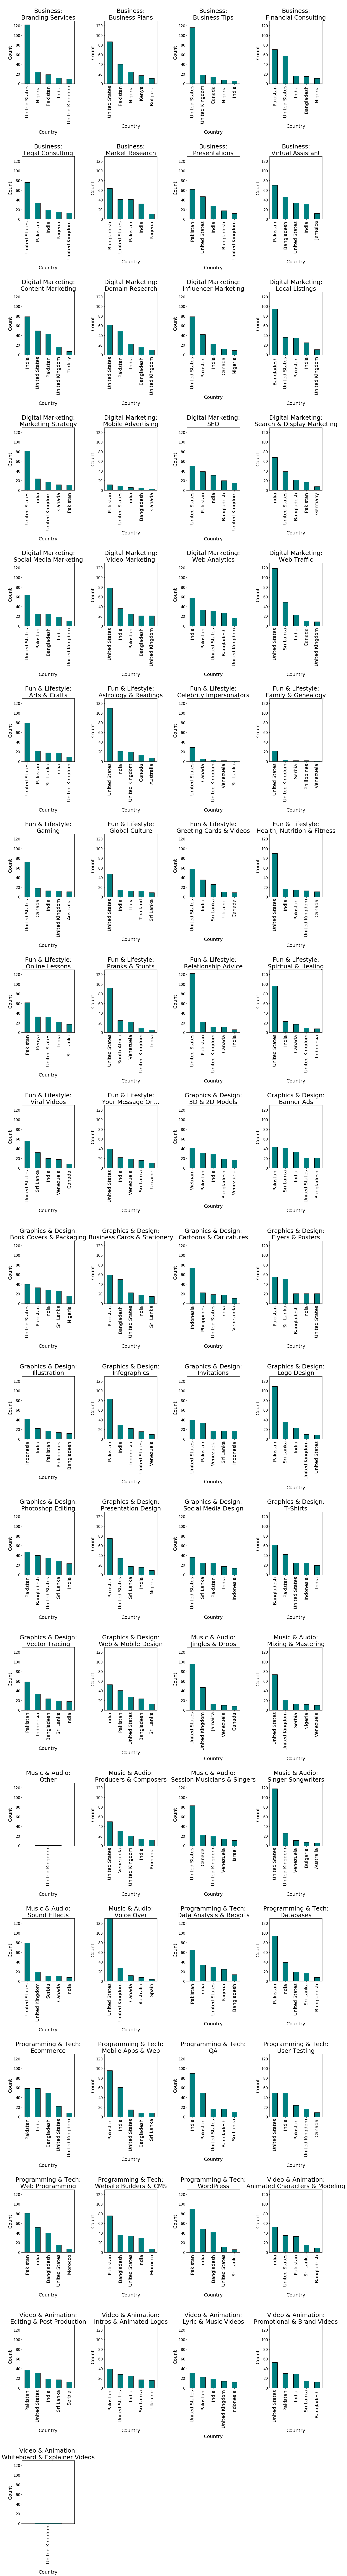

In [229]:
# Representation by Count of Top 5 Countries in each Subcategory

subcategory_df = fiverr.groupby(["subcategory", "location"]).location.agg("count")

Tot = len(subcategory_df.index.levels[0])
Cols = 4

# Compute Rows required

Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

# # Create main figure

fig = plt.figure(figsize=(20,150))

cat_df = fiverr.groupby(["category"]).location.agg("count")

i = 0   

for cat in cat_df.index:
    subcat_df_full = fiverr.loc[fiverr.category == cat,]
    subcat_df = subcat_df_full.groupby(["subcategory", "location"]).location.agg("count")
    for k in range(len(subcat_df.index.levels[0])):
        ax = fig.add_subplot(Rows, Cols, Position[i])
        i += 1
        subcat_df[subcat_df.index.levels[0][k]].sort_values(ascending = False).head(5).plot(kind = "bar", edgecolor ="black", color = "teal")
        plt.xlabel('\n'+ 'Country', fontsize = 20)
        plt.ylabel('Count', fontsize = 20)
        plt.ylim((0,130))
        subcat = str(subcat_df.index.levels[0][k])
        cat = fiverr.loc[fiverr.subcategory == subcat, ].category.iloc[0,]
        title = "\n" + cat + ":" + "\n" + subcat
        plt.title(title, fontsize = 25)
        ax.set_xticklabels([item.get_text() for item in ax.get_xticklabels()], size = 15)
        ax.tick_params(axis='y', which='major', labelsize=15)
        ax.tick_params(axis='x', which='major', labelsize=20)
        

plt.tight_layout()    
plt.show()

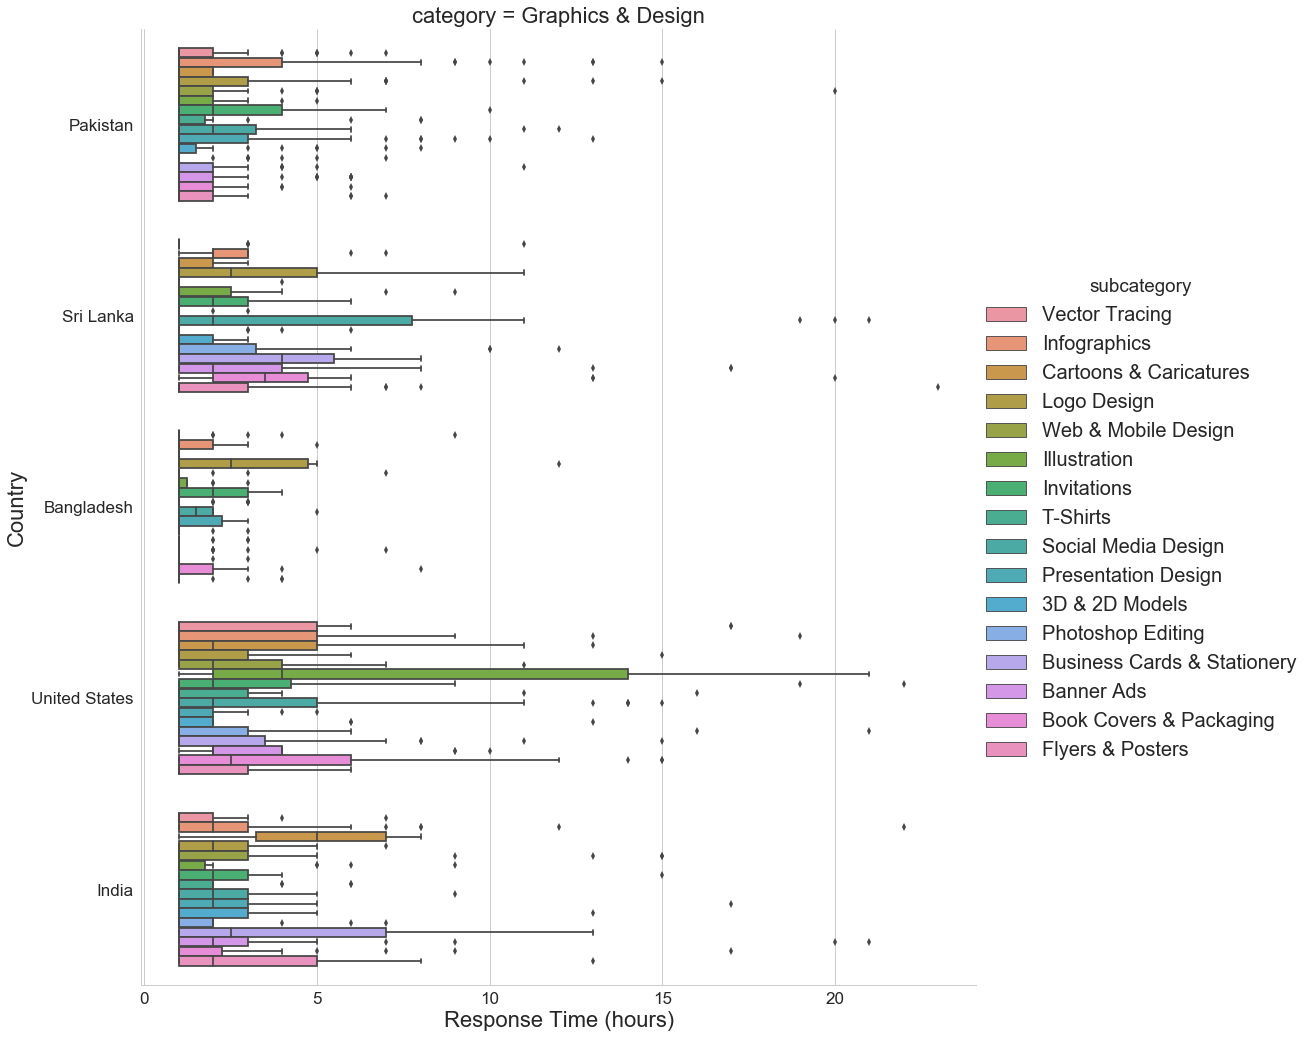

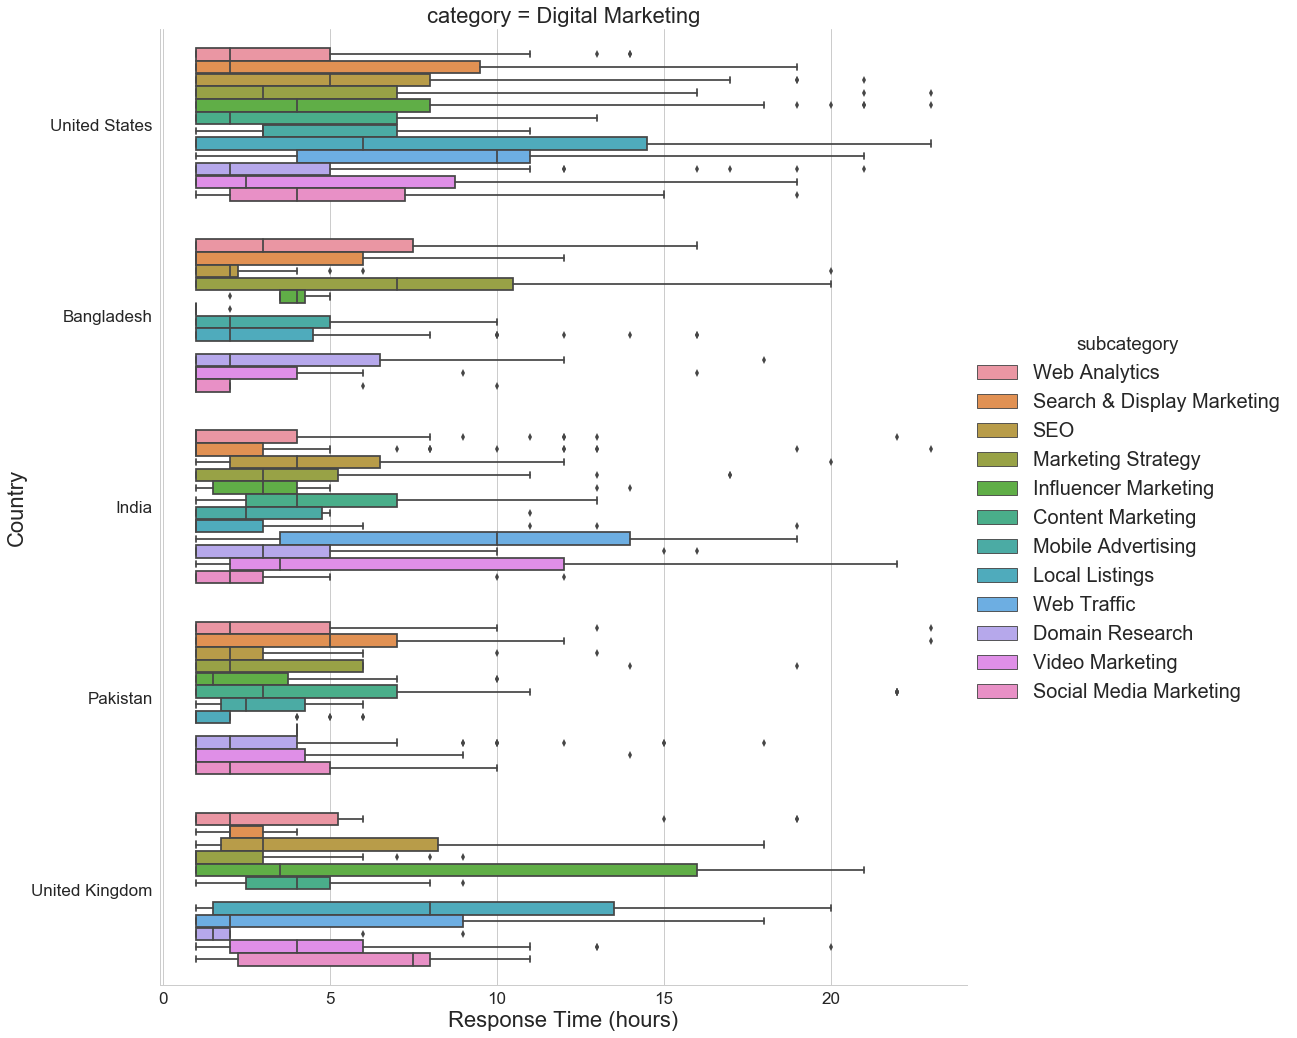

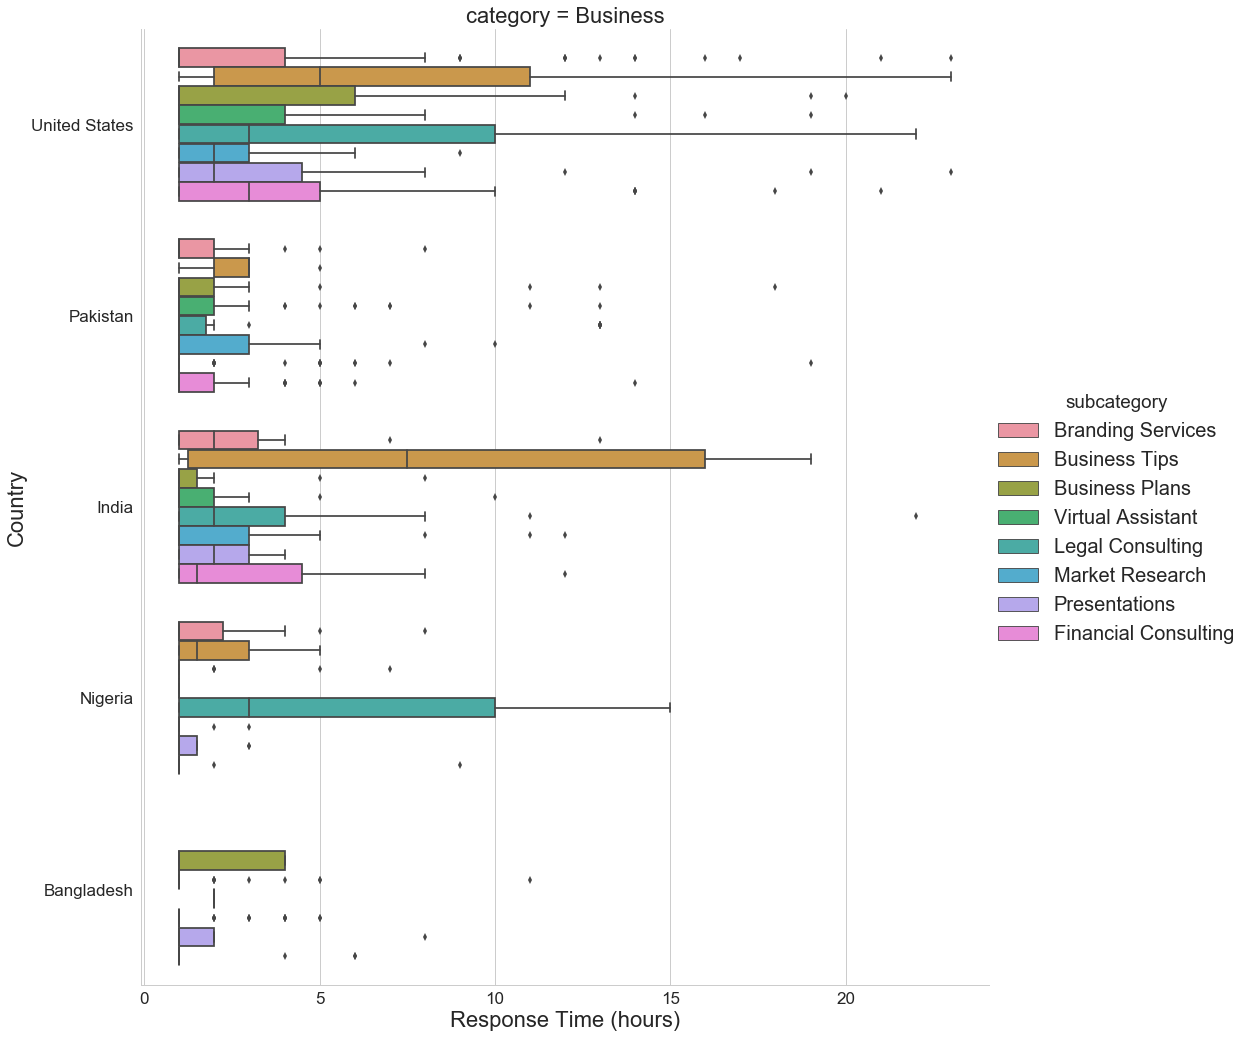

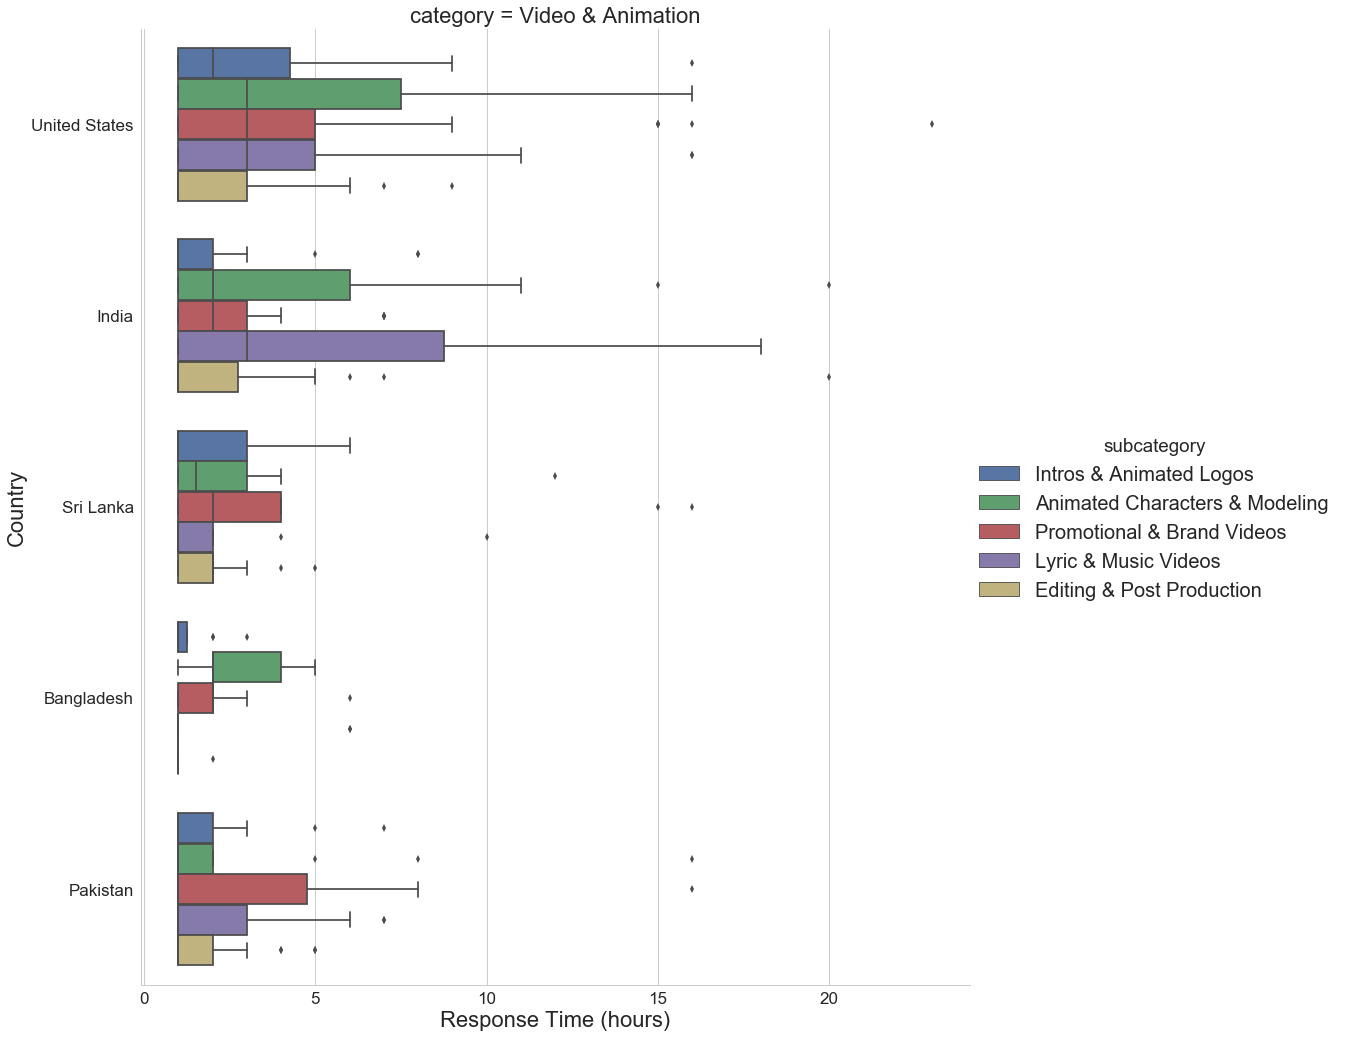

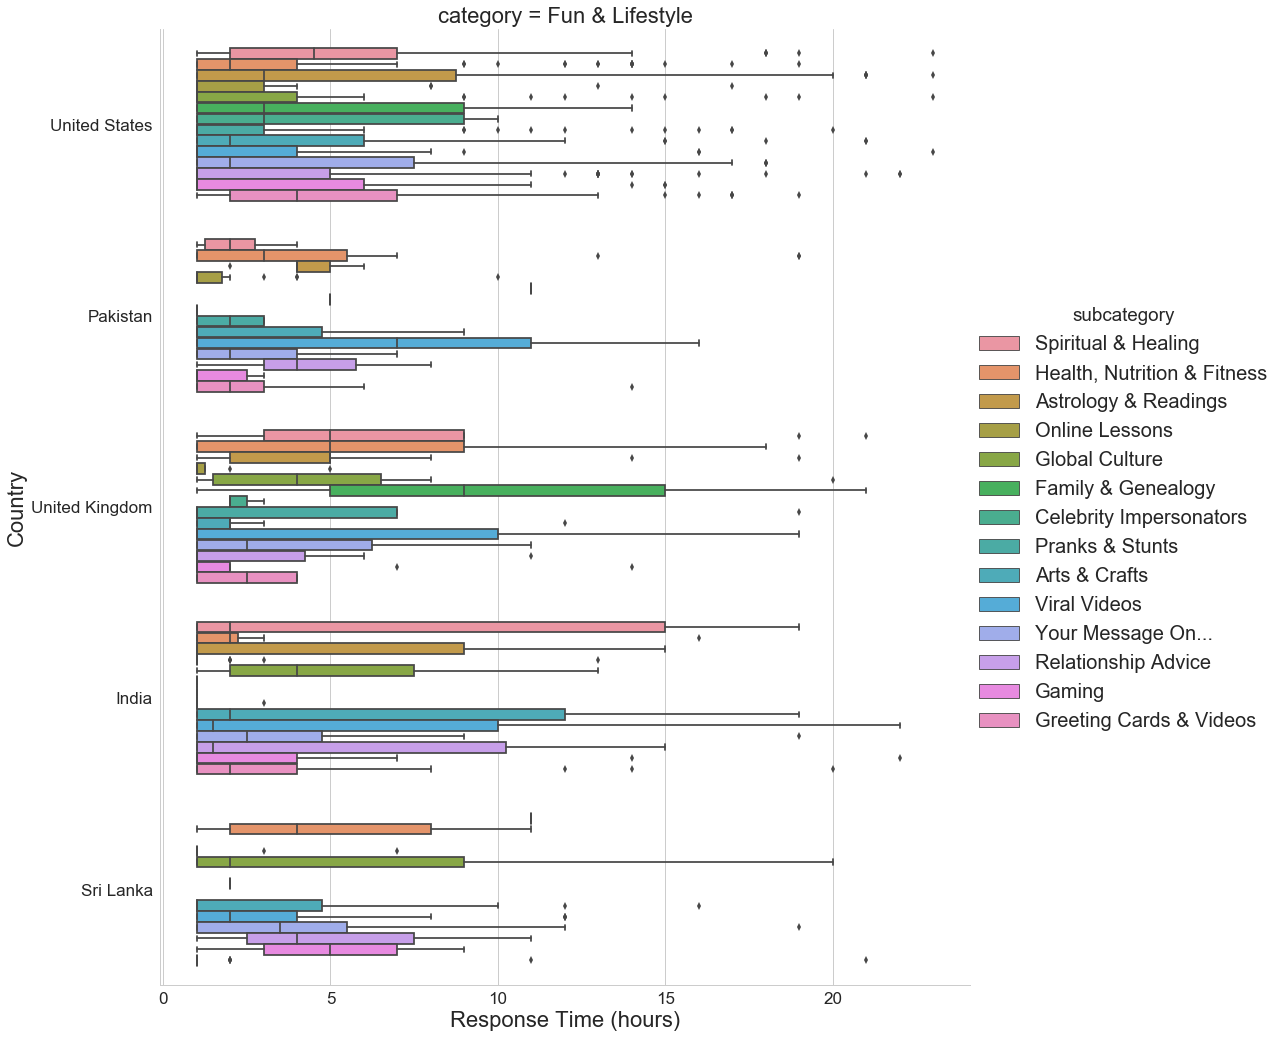

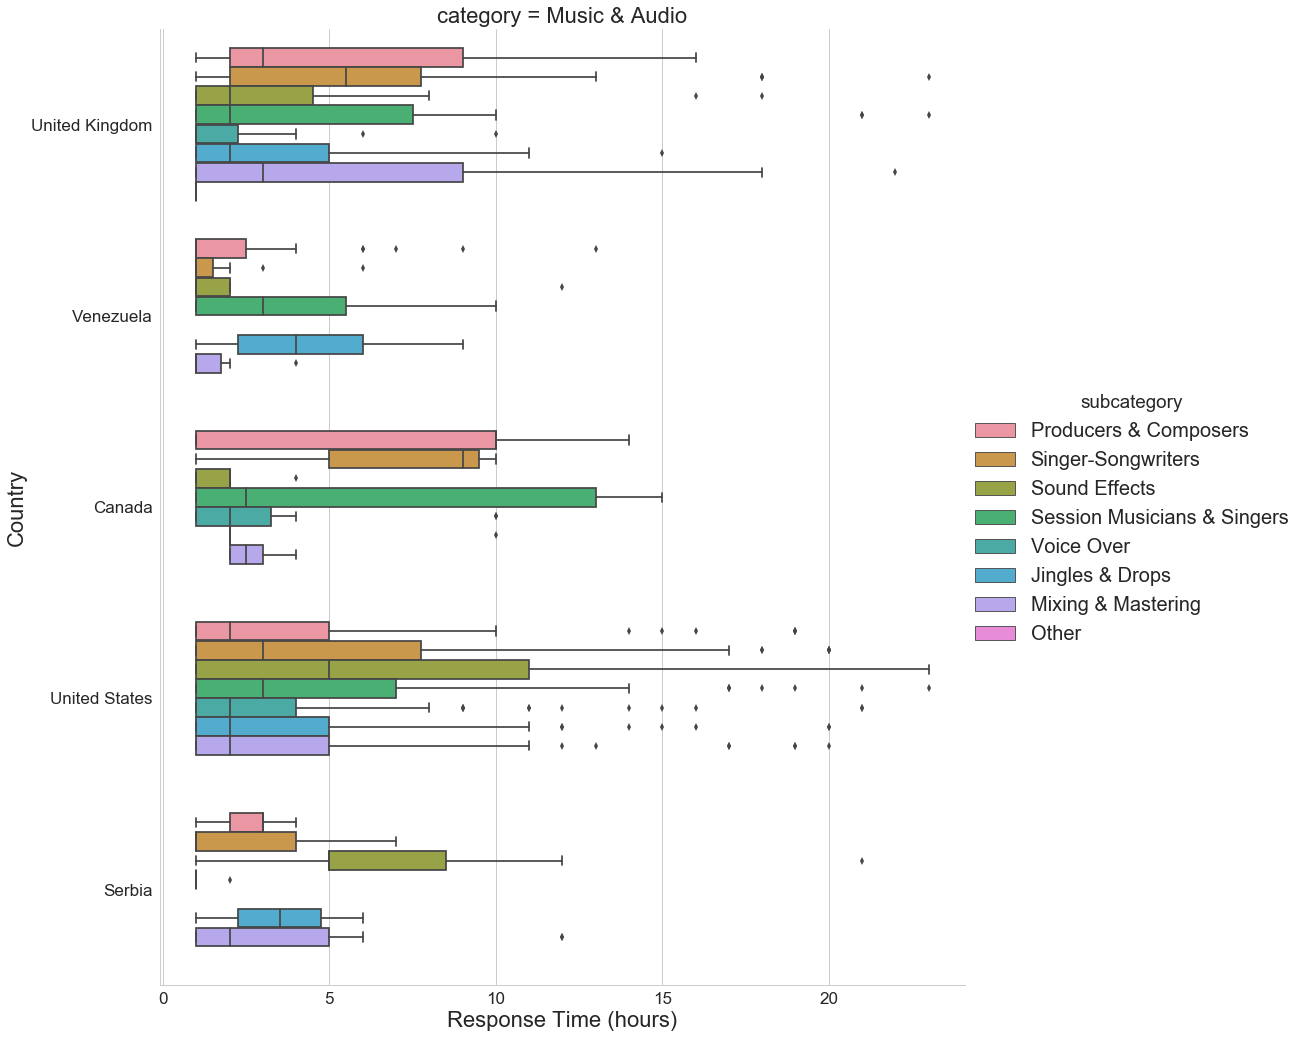

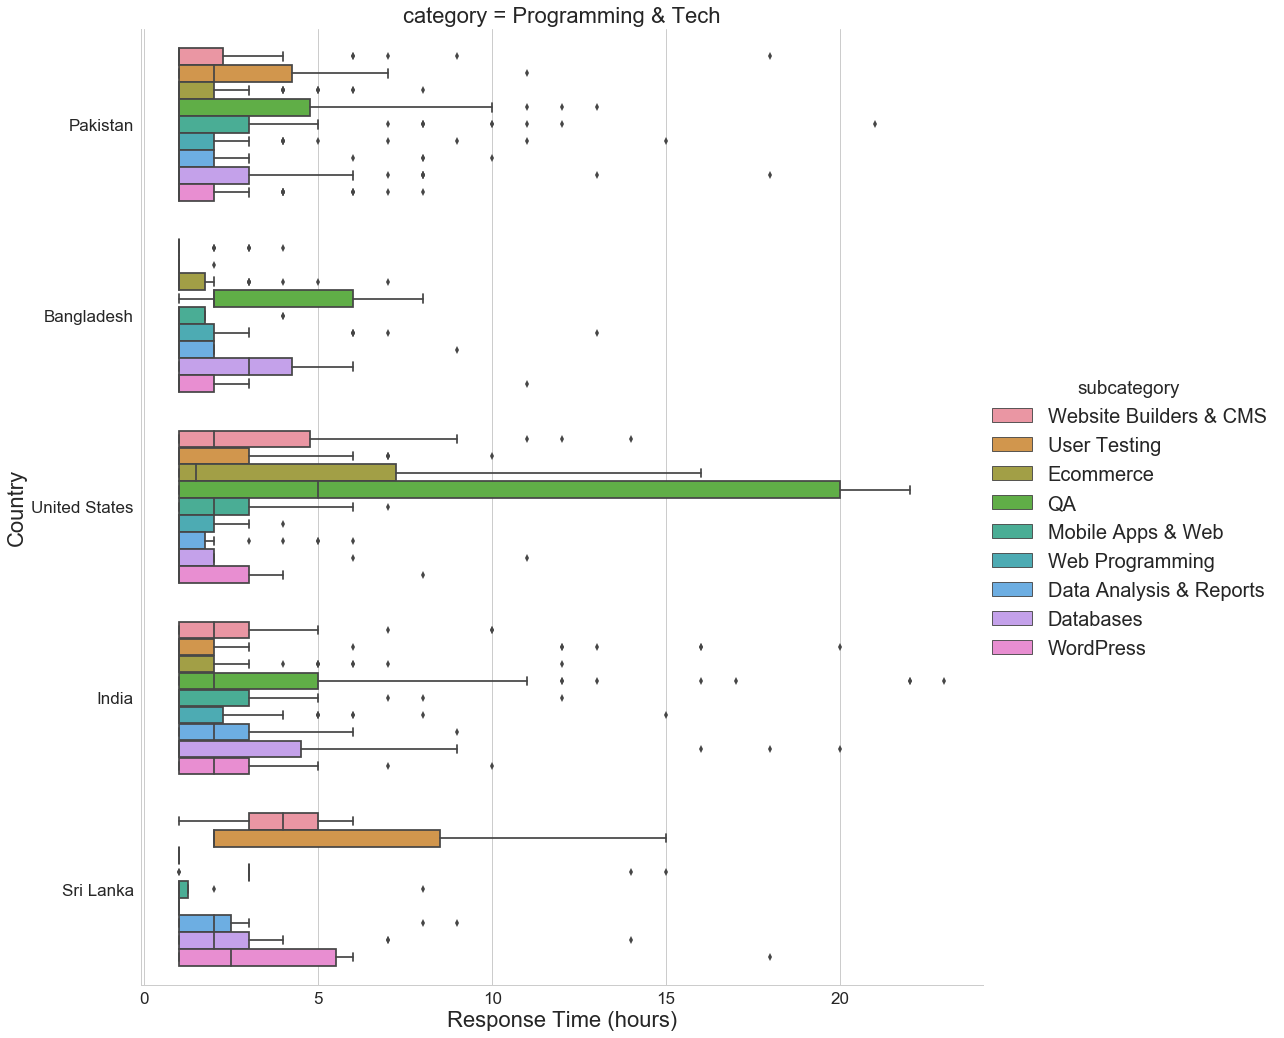

In [249]:
# Response Time by Country for Subcategory in each Category

sns.reset_orig()
sns.set(font_scale=2)

for cat in set(fiverr.category):
    test = fiverr.loc[fiverr.category == cat, ]
    top5 = test.location.value_counts().head(5).index
    test2 = test.loc[test.location.isin(top5), ]
    sns.set_style("whitegrid")
    g = sns.factorplot(x = "ave_response_time_hrs", y="location", hue="subcategory",
               row="category", data=test2, kind="box", size=15, aspect=1);  
    g.set_xticklabels(size = 17)
    g.set_yticklabels(size = 17) 
    g.set(xlabel='Response Time (hours)', ylabel='Country')

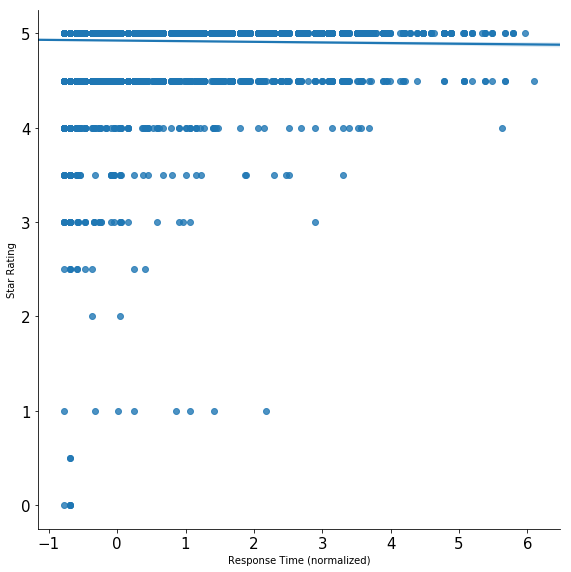

In [231]:
#sns.set(style="ticks", font_scale=2)
g = sns.lmplot("norm_response_time", "star_rating", data = fiverr, size = 8, aspect = 1)
g.set_xticklabels(size = 15)
g.set_yticklabels(size = 15) 
g.set(xlabel='Response Time (normalized)', ylabel='Star Rating')

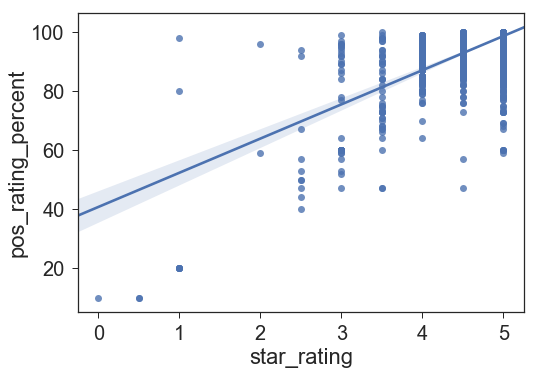

In [84]:
g = sns.regplot("star_rating", "pos_rating_percent", data = fiverr)

In [86]:
from wordcloud import WordCloud, STOPWORDS

In [90]:
word_string = ""

for title in fiverr.title:
    word_string += title + " "

828396


In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(word_string)

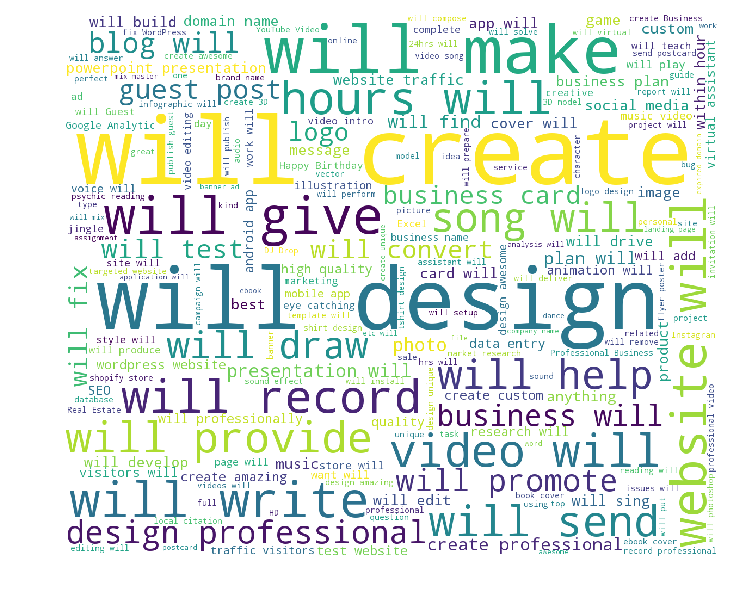

In [102]:
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [168]:
word_string = ""

for lang in fiverr.language:
    try:
        word_string += lang + " "
    except:
        continue

In [245]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(word_string)

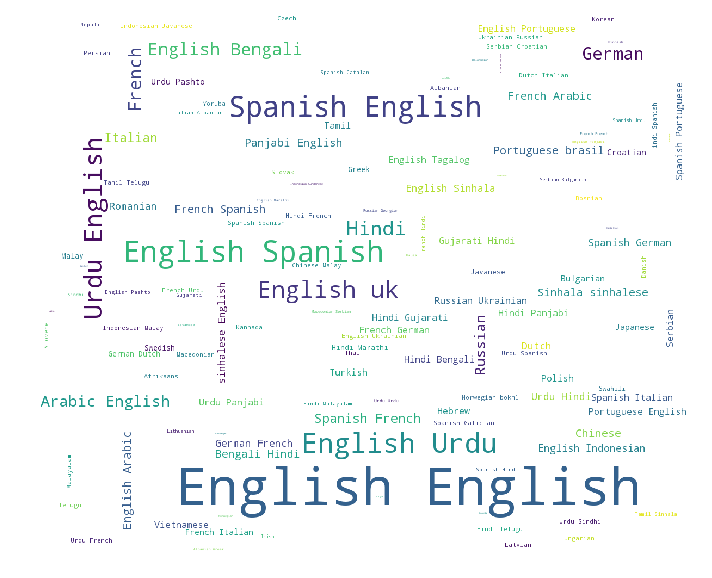

In [246]:
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [136]:
num_languages = []

for x in fiverr.language:
    try:
        num_languages.append(len(x.split(",")))
    except:
        num_languages.append(np.nan)
        
fiverr["num_languages"] = num_languages

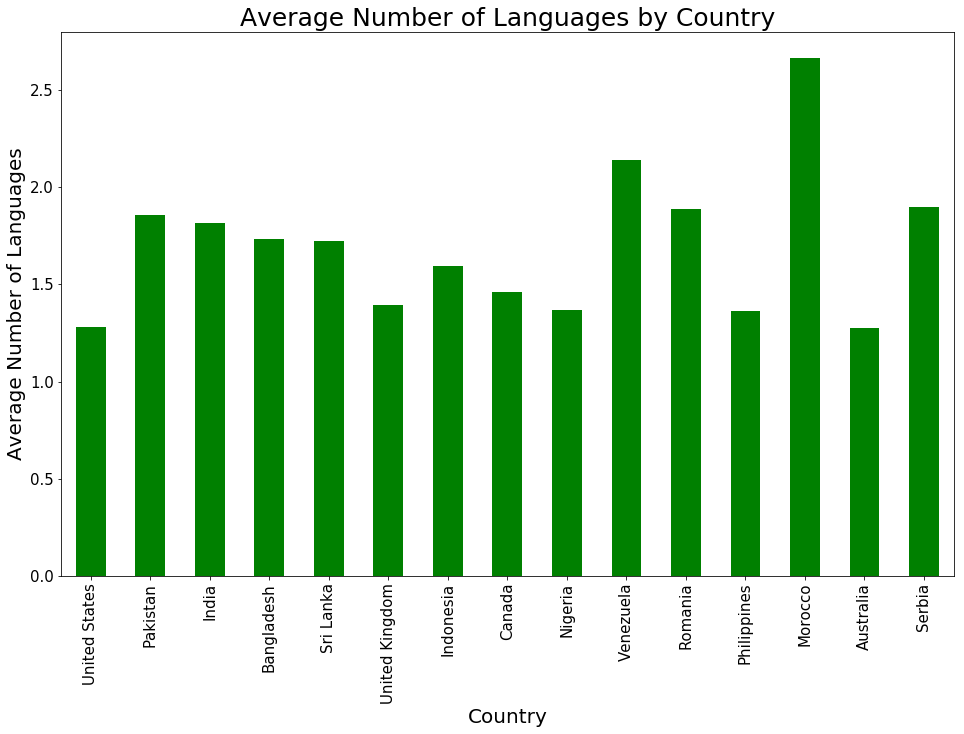

In [166]:
plt.figure(figsize=(16,10))
countries = fiverr.groupby('location')['category'].agg("count").sort_values(ascending=False).head(15).index
subset = fiverr[fiverr.location.isin(countries)]

subset2 = subset.groupby('location').num_languages.agg(["count", "mean"]).sort_values(by = "count", ascending = False)
subset2["mean"].plot.bar(color = "green")

plt.xlabel('Country', fontsize = 20)
plt.ylabel('Average Number of Languages', fontsize = 20)
plt.title('Average Number of Languages by Country', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize = 15)
plt.show()

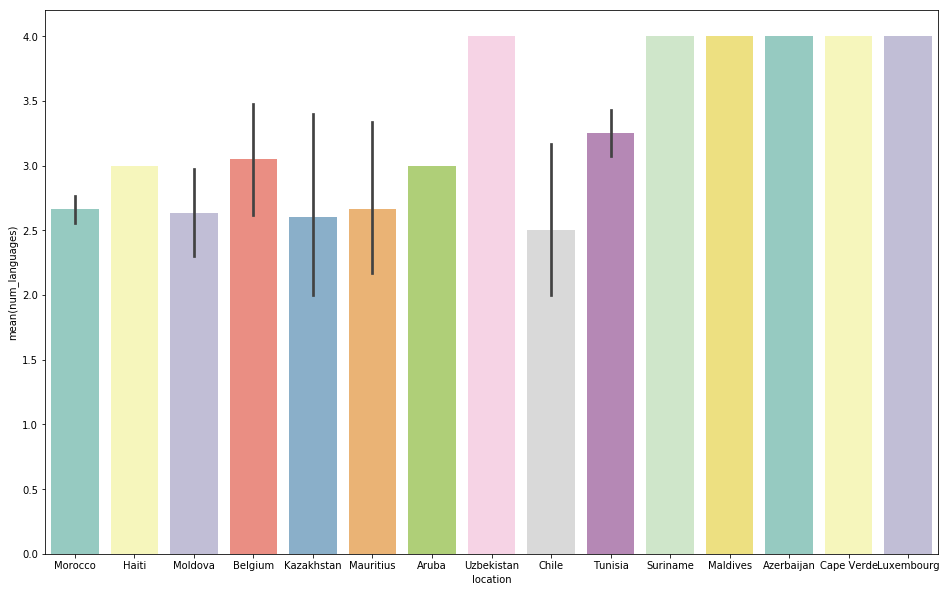

In [157]:
plt.figure(figsize=(16,10))
sns.reset_orig()
countries = fiverr.groupby('location')['num_languages'].agg("mean").sort_values(ascending=False).head(15).index
subset = fiverr[fiverr.location.isin(countries)]
g = sns.barplot("location", "num_languages", data = subset, palette = "Set3")

In [214]:
languages = []

for lang in fiverr.language:
    try:
        languages += lang.split(",")
    except:
        continue
        
languages2 = map(lambda x: x.strip(), languages)
test = pd.DataFrame({"languages":languages2})

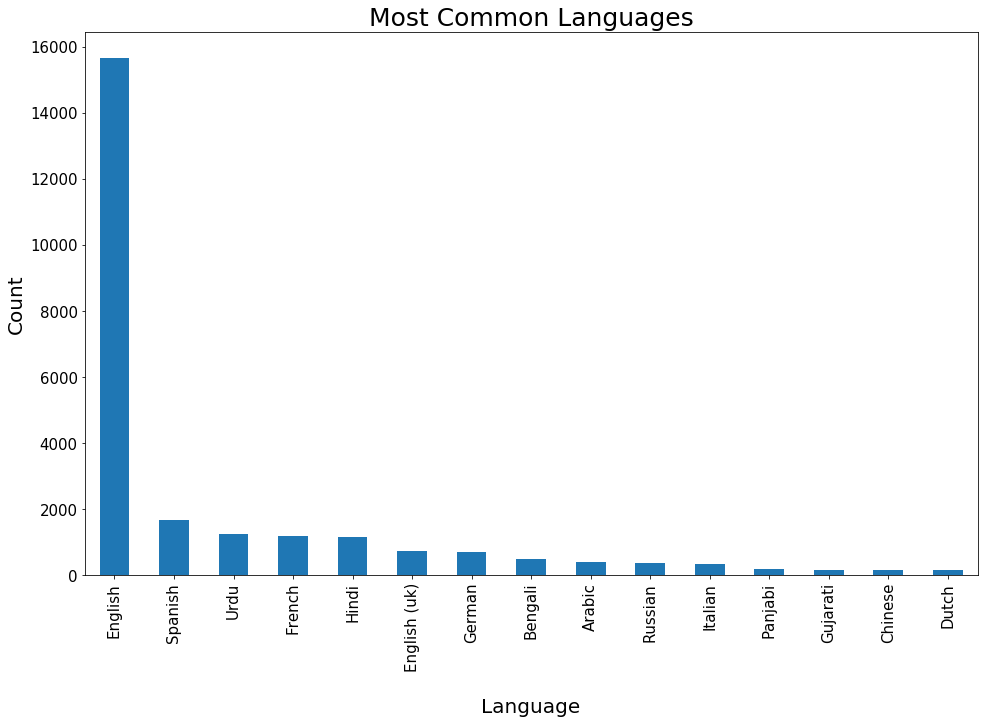

In [222]:
plt.figure(figsize=(16,10))
test.groupby("languages")["languages"].agg("count").sort_values(ascending = False).head(15).plot(kind = "bar")

plt.xlabel('\n' + 'Language', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Most Common Languages', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize = 15)
plt.show()